In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [5]:
dataset = pd.read_csv('Social_Network_Ads.csv')
print(dataset.head())
print(dataset.tail())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
      User ID  Gender  Age  EstimatedSalary  Purchased
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1


In [6]:
X = dataset[['Age', 'EstimatedSalary']]
Y = dataset['Purchased']

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)


In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [10]:
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)

tp = cm[1, 1]
fp = cm[0, 1]
tn = cm[0, 0]
fn = cm[1, 0]

accuracy = accuracy_score(Y_test, Y_pred)
error_rate = 1 - accuracy
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

In [11]:
print("Confusion Matrix:")
print(cm)
print(f"True Positive: {tp}")
print(f"False Positive: {fp}")
print(f"True Negative: {tn}")
print(f"False Negative: {fn}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Confusion Matrix:
[[65  3]
 [ 8 24]]
True Positive: 24
False Positive: 3
True Negative: 65
False Negative: 8
Accuracy: 0.8900
Error Rate: 0.1100
Precision: 0.8889
Recall: 0.7500
F1 Score: 0.8136


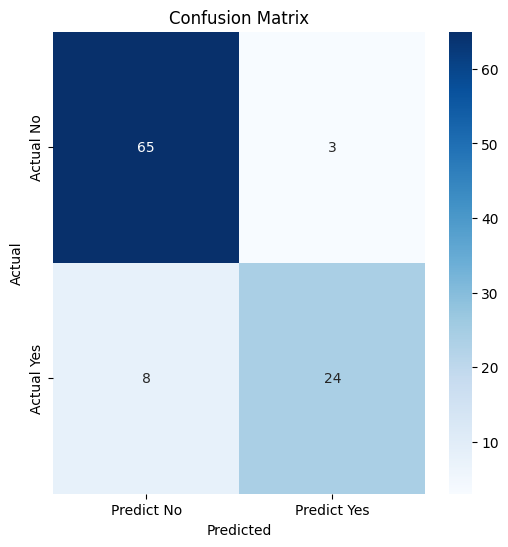

In [13]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predict No", "Predict Yes"],
            yticklabels=["Actual No", "Actual Yes"])

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()